# Activity 7: Optimizing a deep learning model
In this activity we optimize our deep learning model. We aim to achieve greater performance than our model `bitcoin_lstm_v0`, which is off at about 6.8% from the real Bitcoin prices. We explore the following topics in this notebook:

* Experimenting with different layers and the number of nodes
* Grid search strategy for epoch and activation functions

## Load Data

In [1]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from datetime import datetime, timedelta
from keras.models import load_model, Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout, ActivityRegularization
from keras.callbacks import TensorBoard

from scripts.utilities_activity7 import (
    create_groups, split_lstm_input, 
    train_model, plot_two_series, rmse, 
    mape, denormalize)

np.random.seed(0)

Autosaving every 5 seconds


In [3]:
#  Load datasets
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [4]:
#  Convert `date` column to datetime type
test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [5]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)
test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [6]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

## Reference Model

In [9]:
#  TASK:
#  Load data for `v0` of our model.
#  Call this `model_v0`.
model_v0 = load_model('bitcoin_lstm_v0.h5')

In [10]:
%%time

#  TASK:
#  Train the reference model `model_v0`.
#
model_history = train_model(model=model_v0,
                            X=X_train, Y=Y_train,
                            epochs=100,
                            version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 2/100
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3836e-04
Epoch 12/100
1/1 [==============================] - 0s 3ms/step 

1/1 [==============================] - 0s 3ms/step - loss: 4.7442e-06
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9315e-06
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 5.1686e-06
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss: 5.2038e-06
Epoch 100/100
1/1 [==============================] - 0s 3ms/step - loss: 5.2436e-06
CPU times: user 9.14 s, sys: 1.36 s, total: 10.5 s
Wall time: 6.05 s


## Adding Layers and Nodes

In [11]:
#  Initialize variables
period_length = 7
number_of_periods = 76
batch_size = 1

In [14]:
#  Model 1: two LSTM layers
model_v1 = Sequential()

model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))   # note return_sequences is now true

#  TASK:
#  Add new LSTM layer to this network here.
#
model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v1.add(Dense(units=period_length))
model_v1.add(Activation("linear"))

model_v1.compile(loss="mse", optimizer="rmsprop")

In [15]:
%%time
train_model(model=model_v1, X=X_train, Y=Y_train, epochs=200, version=1, run_number=1)

Epoch 1/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 8.9148e-04
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 7.1774e-04
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 5.7647e-04
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 4.6100e-04
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 3.6666e-04
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss: 2.8990e-04
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2787e-04
Epoch 13/200
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 9.2043e-06
Epoch 101/200
1/1 [==============================] - 0s 5ms/step - loss: 8.8138e-06
Epoch 102/200
1/1 [==============================] - 0s 4ms/step - loss: 8.8679e-06
Epoch 103/200
1/1 [==============================] - 0s 4ms/step - loss: 8.9858e-06
Epoch 104/200
1/1 [==============================] - 0s 3ms/step - loss: 9.4745e-06
Epoch 105/200
1/1 [==============================] - 0s 4ms/step - loss: 9.8907e-06
Epoch 106/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0518e-05
Epoch 107/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0816e-05
Epoch 108/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1135e-05
Epoch 109/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0957e-05
Epoch 110/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0801e-05
Epoch 111/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0268e-05
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 4.4438e-06
Epoch 198/200
1/1 [==============================] - 0s 6ms/step - loss: 4.9527e-06
Epoch 199/200
1/1 [==============================] - 0s 3ms/step - loss: 5.8612e-06
Epoch 200/200
1/1 [==============================] - 0s 3ms/step - loss: 6.7969e-06
CPU times: user 18.6 s, sys: 2.31 s, total: 20.9 s
Wall time: 13.3 s


## Epochs

In [20]:
# Model 2: two LSTM layers, trained for 300 epochs
model_v2 = Sequential()

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v2.add(Dense(units=period_length))
model_v2.add(Activation("linear"))

model_v2.compile(loss="mse", optimizer="rmsprop")

In [21]:
%%time

#  TASK:
#  Change the number of epochs below
#  to 300 and evaluate the results on TensorBoard.
#
train_model(model=model_v2, X=X_train, Y=Y_train, epochs=300, version=2, run_number=2)

Epoch 1/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 9.0331e-04
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 8.0278e-04
Epoch 10/300
1/1 [==============================] - ETA: 0s - loss: 7.1211e-0 - 0s 5ms/step - loss: 7.1211e-04
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 6.2976e-04
Epoch 12/300
1/1 [==============================] - 0s 4ms/step - loss: 5.5459e-04
Epoch 13/300


1/1 [==============================] - 0s 7ms/step - loss: 3.2366e-06
Epoch 100/300
1/1 [==============================] - 0s 6ms/step - loss: 4.3347e-06
Epoch 101/300
1/1 [==============================] - 0s 8ms/step - loss: 6.6385e-06
Epoch 102/300
1/1 [==============================] - 0s 5ms/step - loss: 9.3440e-06
Epoch 103/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1592e-05
Epoch 104/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0932e-05
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 8.7643e-06
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 6.5491e-06
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 5.0873e-06
Epoch 108/300
1/1 [==============================] - 0s 4ms/step - loss: 5.0373e-06
Epoch 109/300
1/1 [==============================] - 0s 4ms/step - loss: 5.8684e-06
Epoch 110/300
1/1 [==============================] - 0s 4ms/step - loss: 7.7576e-06
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 6.2219e-06
Epoch 197/300
1/1 [==============================] - 0s 4ms/step - loss: 6.1865e-06
Epoch 198/300
1/1 [==============================] - 0s 6ms/step - loss: 5.7701e-06
Epoch 199/300
1/1 [==============================] - 0s 5ms/step - loss: 4.4100e-06
Epoch 200/300
1/1 [==============================] - 0s 4ms/step - loss: 3.6968e-06
Epoch 201/300
1/1 [==============================] - 0s 4ms/step - loss: 3.3347e-06
Epoch 202/300
1/1 [==============================] - 0s 3ms/step - loss: 3.4927e-06
Epoch 203/300
1/1 [==============================] - 0s 3ms/step - loss: 4.1143e-06
Epoch 204/300
1/1 [==============================] - 0s 4ms/step - loss: 4.6687e-06
Epoch 205/300
1/1 [==============================] - 0s 3ms/step - loss: 5.3320e-06
Epoch 206/300
1/1 [==============================] - 0s 3ms/step - loss: 5.1749e-06
Epoch 207/300
1/1 [==============================] - 0s 3ms/step - loss: 5.2464e-06
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 9.6353e-06
Epoch 294/300
1/1 [==============================] - 0s 3ms/step - loss: 7.7568e-06
Epoch 295/300
1/1 [==============================] - 0s 4ms/step - loss: 6.1400e-06
Epoch 296/300
1/1 [==============================] - ETA: 0s - loss: 4.4061e-0 - 0s 3ms/step - loss: 4.4061e-06
Epoch 297/300
1/1 [==============================] - ETA: 0s - loss: 3.4040e-0 - 0s 3ms/step - loss: 3.4040e-06
Epoch 298/300
1/1 [==============================] - 0s 4ms/step - loss: 2.4023e-06
Epoch 299/300
1/1 [==============================] - 0s 4ms/step - loss: 1.9452e-06
Epoch 300/300
1/1 [==============================] - ETA: 0s - loss: 1.5736e-0 - 0s 4ms/step - loss: 1.5736e-06
CPU times: user 28 s, sys: 4.1 s, total: 32.1 s
Wall time: 18.1 s


## Activation Functions

In [23]:
# Model 3: two LSTM layers, trained for 300 epochs,
#          tanh activation function
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

#  TASK:
#  Change the activation function
#  from "linear" to "tanh".
#
model_v3.add(Activation("tanh"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [24]:
%%time
train_model(model=model_v3, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 9.7731e-04
Epoch 12/300
1/1 [==============================] - 0s 4ms/step - loss: 8.7109e-04
Epoch 13/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 5ms/step - loss: 1.0872e-05
Epoch 100/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0845e-05
Epoch 101/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0833e-05
Epoch 102/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0714e-05
Epoch 103/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0626e-05
Epoch 104/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0449e-05
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0208e-05
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 9.6816e-06
Epoch 107/300
1/1 [==============================] - 0s 4ms/step - loss: 9.2164e-06
Epoch 108/300
1/1 [==============================] - 0s 3ms/step - loss: 8.9591e-06
Epoch 109/300
1/1 [==============================] - 0s 3ms/step - loss: 9.0684e-06
Epoch 110/300
1/1 [==============================] - 0s 3ms/step - loss: 9.5779e-06
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 9.0605e-06
Epoch 197/300
1/1 [==============================] - 0s 4ms/step - loss: 9.4633e-06
Epoch 198/300
1/1 [==============================] - 0s 4ms/step - loss: 9.4254e-06
Epoch 199/300
1/1 [==============================] - 0s 3ms/step - loss: 9.0499e-06
Epoch 200/300
1/1 [==============================] - 0s 3ms/step - loss: 8.4993e-06
Epoch 201/300
1/1 [==============================] - 0s 4ms/step - loss: 8.0039e-06
Epoch 202/300
1/1 [==============================] - 0s 4ms/step - loss: 7.7001e-06
Epoch 203/300
1/1 [==============================] - 0s 4ms/step - loss: 7.6488e-06
Epoch 204/300
1/1 [==============================] - 0s 3ms/step - loss: 7.9059e-06
Epoch 205/300
1/1 [==============================] - 0s 3ms/step - loss: 8.4913e-06
Epoch 206/300
1/1 [==============================] - 0s 5ms/step - loss: 9.2910e-06
Epoch 207/300
1/1 [==============================] - 0s 4ms/step - loss: 9.9224e-06
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 7.9198e-06
Epoch 294/300
1/1 [==============================] - 0s 5ms/step - loss: 7.2525e-06
Epoch 295/300
1/1 [==============================] - 0s 4ms/step - loss: 6.6220e-06
Epoch 296/300
1/1 [==============================] - 0s 3ms/step - loss: 6.2450e-06
Epoch 297/300
1/1 [==============================] - 0s 5ms/step - loss: 6.1420e-06
Epoch 298/300
1/1 [==============================] - 0s 4ms/step - loss: 6.3741e-06
Epoch 299/300
1/1 [==============================] - 0s 4ms/step - loss: 6.9269e-06
Epoch 300/300
1/1 [==============================] - 0s 4ms/step - loss: 7.7617e-06
CPU times: user 27.2 s, sys: 4.18 s, total: 31.3 s
Wall time: 18 s


## Regularization Strategies

In [26]:
model_v4 = Sequential()
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

#  TASK:
#  Implement a Dropout() here.
#
model_v4.add(Dropout(0.5))

model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

#  TASK:
#  Implement a Dropout() here too.
#
model_v4.add(Dropout(0.5))

model_v4.add(Dense(units=period_length))
model_v4.add(Activation("tanh"))

model_v4.compile(loss="mse", optimizer="rmsprop")

In [27]:
%%time
train_model(model=model_v4, X=X_train, Y=Y_train, epochs=600, version=4, run_number=0)

Epoch 1/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 2/600
1/1 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 4/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 5/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 6/600
1/1 [==============================] - 0s 4ms/step - loss: 9.9061e-04
Epoch 7/600
1/1 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 8/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 9/600
1/1 [==============================] - 0s 6ms/step - loss: 9.7004e-04
Epoch 10/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/600
1/1 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 12/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 13/600
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 3.9398e-04
Epoch 101/600
1/1 [==============================] - 0s 3ms/step - loss: 1.9110e-05
Epoch 102/600
1/1 [==============================] - 0s 3ms/step - loss: 1.9813e-04
Epoch 103/600
1/1 [==============================] - 0s 5ms/step - loss: 6.9669e-05
Epoch 104/600
1/1 [==============================] - 0s 5ms/step - loss: 6.7884e-05
Epoch 105/600
1/1 [==============================] - 0s 8ms/step - loss: 6.2937e-05
Epoch 106/600
1/1 [==============================] - 0s 4ms/step - loss: 4.5395e-05
Epoch 107/600
1/1 [==============================] - 0s 6ms/step - loss: 7.5316e-05
Epoch 108/600
1/1 [==============================] - 0s 4ms/step - loss: 3.1678e-05
Epoch 109/600
1/1 [==============================] - 0s 5ms/step - loss: 2.4046e-05
Epoch 110/600
1/1 [==============================] - 0s 5ms/step - loss: 7.4541e-05
Epoch 111/600
1/1 [==============================] - 0s 6ms/step - loss: 5.9916e-05
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 2.8980e-06
Epoch 198/600
1/1 [==============================] - 0s 4ms/step - loss: 3.5332e-05
Epoch 199/600
1/1 [==============================] - 0s 4ms/step - loss: 3.9089e-05
Epoch 200/600
1/1 [==============================] - 0s 3ms/step - loss: 1.0407e-04
Epoch 201/600
1/1 [==============================] - 0s 3ms/step - loss: 1.8492e-05
Epoch 202/600
1/1 [==============================] - 0s 5ms/step - loss: 3.7884e-06
Epoch 203/600
1/1 [==============================] - 0s 4ms/step - loss: 1.6587e-05
Epoch 204/600
1/1 [==============================] - 0s 3ms/step - loss: 1.0632e-04
Epoch 205/600
1/1 [==============================] - 0s 4ms/step - loss: 9.4285e-06
Epoch 206/600
1/1 [==============================] - 0s 3ms/step - loss: 4.6847e-06
Epoch 207/600
1/1 [==============================] - 0s 6ms/step - loss: 6.8824e-05
Epoch 208/600
1/1 [==============================] - 0s 3ms/step - loss: 6.9708e-06
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 5.0075e-06
Epoch 295/600
1/1 [==============================] - 0s 4ms/step - loss: 4.7971e-06
Epoch 296/600
1/1 [==============================] - 0s 4ms/step - loss: 1.1835e-06
Epoch 297/600
1/1 [==============================] - 0s 5ms/step - loss: 3.1778e-06
Epoch 298/600
1/1 [==============================] - 0s 4ms/step - loss: 3.7422e-06
Epoch 299/600
1/1 [==============================] - 0s 3ms/step - loss: 6.2599e-06
Epoch 300/600
1/1 [==============================] - 0s 3ms/step - loss: 1.2912e-05
Epoch 301/600
1/1 [==============================] - 0s 4ms/step - loss: 1.7544e-05
Epoch 302/600
1/1 [==============================] - 0s 4ms/step - loss: 3.1197e-06
Epoch 303/600
1/1 [==============================] - 0s 3ms/step - loss: 1.5356e-05
Epoch 304/600
1/1 [==============================] - 0s 3ms/step - loss: 4.8020e-06
Epoch 305/600
1/1 [==============================] - 0s 3ms/step - loss: 3.9270e-05
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 1.1326e-05
Epoch 392/600
1/1 [==============================] - 0s 3ms/step - loss: 9.9066e-06
Epoch 393/600
1/1 [==============================] - 0s 4ms/step - loss: 3.4580e-06
Epoch 394/600
1/1 [==============================] - 0s 3ms/step - loss: 1.4056e-07
Epoch 395/600
1/1 [==============================] - 0s 3ms/step - loss: 8.7845e-06
Epoch 396/600
1/1 [==============================] - 0s 3ms/step - loss: 8.5371e-06
Epoch 397/600
1/1 [==============================] - 0s 3ms/step - loss: 4.7185e-06
Epoch 398/600
1/1 [==============================] - 0s 3ms/step - loss: 3.7729e-07
Epoch 399/600
1/1 [==============================] - ETA: 0s - loss: 1.8460e-0 - 0s 3ms/step - loss: 1.8460e-06
Epoch 400/600
1/1 [==============================] - 0s 3ms/step - loss: 4.6264e-06
Epoch 401/600
1/1 [==============================] - 0s 3ms/step - loss: 6.3998e-06
Epoch 402/600
1/1 [==============================] - 0s 4ms/st

1/1 [==============================] - 0s 5ms/step - loss: 2.6826e-06
Epoch 489/600
1/1 [==============================] - 0s 4ms/step - loss: 9.4693e-07
Epoch 490/600
1/1 [==============================] - 0s 3ms/step - loss: 1.7162e-06
Epoch 491/600
1/1 [==============================] - 0s 4ms/step - loss: 1.3455e-05
Epoch 492/600
1/1 [==============================] - 0s 4ms/step - loss: 2.8519e-05
Epoch 493/600
1/1 [==============================] - 0s 3ms/step - loss: 1.9064e-05
Epoch 494/600
1/1 [==============================] - 0s 5ms/step - loss: 5.7159e-06
Epoch 495/600
1/1 [==============================] - 0s 4ms/step - loss: 1.4511e-06
Epoch 496/600
1/1 [==============================] - 0s 4ms/step - loss: 3.1878e-06
Epoch 497/600
1/1 [==============================] - 0s 4ms/step - loss: 9.6090e-06
Epoch 498/600
1/1 [==============================] - 0s 4ms/step - loss: 4.3408e-06
Epoch 499/600
1/1 [==============================] - 0s 3ms/step - loss: 4.6624e-06
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 1.2834e-06
Epoch 586/600
1/1 [==============================] - ETA: 0s - loss: 1.3821e-0 - 0s 4ms/step - loss: 1.3821e-06
Epoch 587/600
1/1 [==============================] - 0s 3ms/step - loss: 7.5321e-06
Epoch 588/600
1/1 [==============================] - 0s 3ms/step - loss: 1.6776e-06
Epoch 589/600
1/1 [==============================] - 0s 4ms/step - loss: 1.4556e-06
Epoch 590/600
1/1 [==============================] - 0s 4ms/step - loss: 3.0340e-06
Epoch 591/600
1/1 [==============================] - 0s 2ms/step - loss: 6.3049e-07
Epoch 592/600
1/1 [==============================] - 0s 4ms/step - loss: 1.9489e-05
Epoch 593/600
1/1 [==============================] - 0s 4ms/step - loss: 4.1265e-06
Epoch 594/600
1/1 [==============================] - 0s 5ms/step - loss: 8.3179e-06
Epoch 595/600
1/1 [==============================] - 0s 4ms/step - loss: 1.4511e-06
Epoch 596/600
1/1 [==============================] - 0s 4ms/st

## Evaluate Models

In [28]:
combined_set = np.concatenate((train_data, test_data), axis=1)

def evaluate_model(model, kind='series'):
    """Compute the MSE for all future weeks in period.
    
    Parameters
    ----------
    model: Keras trained model
    
    kind: str, default 'series'
        Kind of evaluation to perform. If 'series', 
        then the model will perform an evaluation 
        over the complete series.
    
    Returns
    -------
    evaluated_weeks: list
        List of MSE values for each evaluated
        test week.
    """
    if kind == 'series':
        predicted_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+76]
            predicted_weeks.append(model.predict(input_series))

        predicted_days = []
        for week in predicted_weeks:
            predicted_days += list(week[0])

        return predicted_days
    else:
        evaluated_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]

            X_test = input_series[0:,:-1].reshape(1, input_series.shape[1] - 1, 7)
            Y_test = input_series[0:,-1:][0]

            result = model.evaluate(x=X_test, y=Y_test, verbose=0)
            evaluated_weeks.append(result)
            
            return evaluated_weeks


In [29]:
def plot_weekly_mse(series, model_name, color):
    """Plot weekly MSE."""
    ax = pd.Series(series).plot(drawstyle="steps-post",
                                figsize=(14,4),
                                color=color,
                                grid=True,
                                label=model_name,
                                alpha=0.7,
                                title='Mean Squared Error (MSE) for Test Data (all models)'.format(
                                       model_name))

    ax.set_xticks(range(0, len(series)))
    ax.set_xlabel("Predicted Week")
    ax.set_ylabel("MSE")

    return ax

In [30]:
def plot_weekly_predictions(predicted_days, name, display_plot=True, 
                            variable='close'):
    """Plot weekly predictions and calculate RMSE and MAPE."""
    
    # Create dataframe to store predictions and associated dates
    last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
    list_of_days = []
    for days in range(1, len(predicted_days) + 1):
        D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
        list_of_days.append(D)
    
    predicted = pd.DataFrame({
        'date': list_of_days,
        'close_point_relative_normalization': predicted_days
    })
    
    # Convert `date` variable to datetime
    predicted['date'] = predicted['date'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Create iso_week column in `predicted` dataframe
    predicted['iso_week'] = predicted['date'].apply(
        lambda x: x.strftime('%Y-%U'))

    # Denormalize predictions
    predicted_close = predicted.groupby('iso_week').apply(
        lambda x: denormalize(test[:-3], x))

    # Plot denormalized predictions and observed values
    plot_two_series(test[:-3], predicted_close,
                    variable=variable,
                    title=f'{name}: Predictions per Week')
    
    # Calculate RMSE and MAPE
    print(f'RMSE: {rmse(test[:-3][variable], predicted_close[variable]):.2f}')
    print(f'MAPE: {mape(test[:-3][variable], predicted_close[variable]):.2f}%')

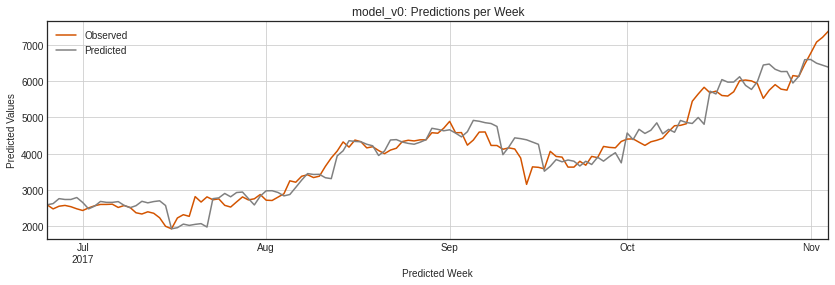

RMSE: 352.16
MAPE: 6.77%


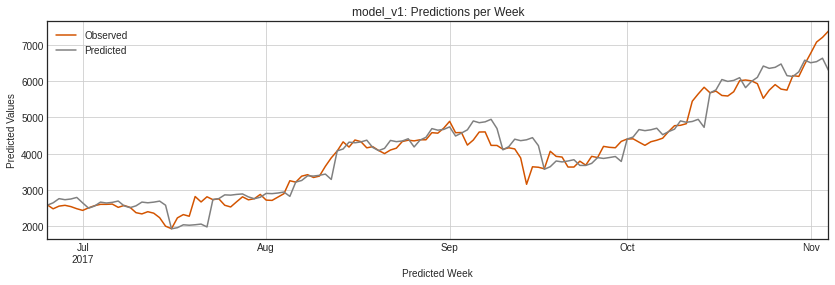

RMSE: 350.42
MAPE: 6.43%


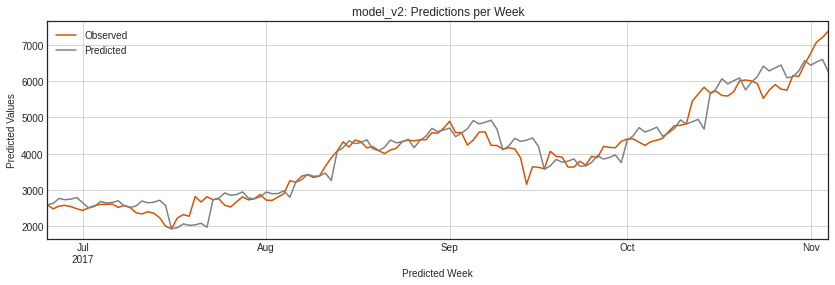

RMSE: 353.00
MAPE: 6.51%


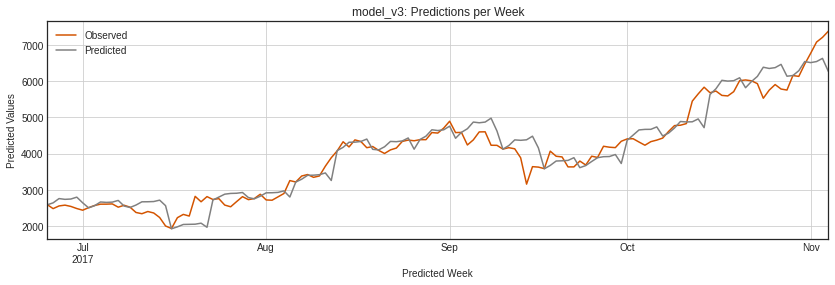

RMSE: 351.91
MAPE: 6.52%


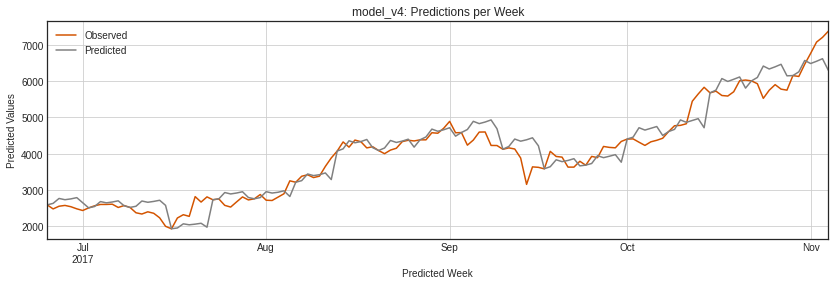

RMSE: 352.77
MAPE: 6.54%


In [31]:
#  Evaluate each model trained in this activity in sequence
models = [model_v0, model_v1, model_v2, model_v3, model_v4]
for i, M in enumerate(models):
    predicted_days = evaluate_model(M, kind='series')
    plot_weekly_predictions(predicted_days, f'model_v{i}')